In [1]:
# montar o drive
#from google.colab import drive
#drive.mount('/content/drive')

# /content/drive/My Drive/curso_fundamentos_de_deep_learning/09_CNN-ConvolutionalNeuralNetworks/traffic-signs-data.zip

In [2]:
# temos um conjunto de imagens que iremos treinar usando cnn

# importar bibliotecas
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

In [3]:
roupas_treino_df = pd.read_csv('fashion-mnist-train.csv', sep=',')

# irei usar roupas_teste_df para verificar acurácia do modelo
roupas_teste_df = pd.read_csv('fashion-mnist-test.csv', sep=',')


In [4]:
# Cada linha são 785 entradas
# label é o rótulo
# 784 colunas que são os pixels
roupas_treino_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
roupas_treino_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
roupas_treino_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
roupas_teste_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
roupas_teste_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [9]:
roupas_teste_df.shape

(10000, 785)

In [10]:
roupas_treino_df.shape

(60000, 785)

In [11]:
treino = np.array(roupas_treino_df, dtype='float32' )

In [12]:
treino

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
teste = np.array(roupas_teste_df, dtype='float32' )

In [14]:
teste

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
teste.shape

(10000, 785)

In [16]:
treino.shape

(60000, 785)

0.0


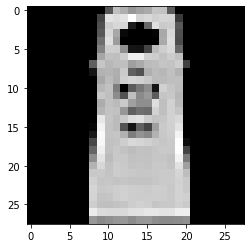

In [17]:
import random
indice=1
indice=random.randint(1,60000)
print(treino[indice,0])
img_roupa = treino[indice,1:].reshape(28,28)
plt.imshow(img_roupa, cmap='gray')

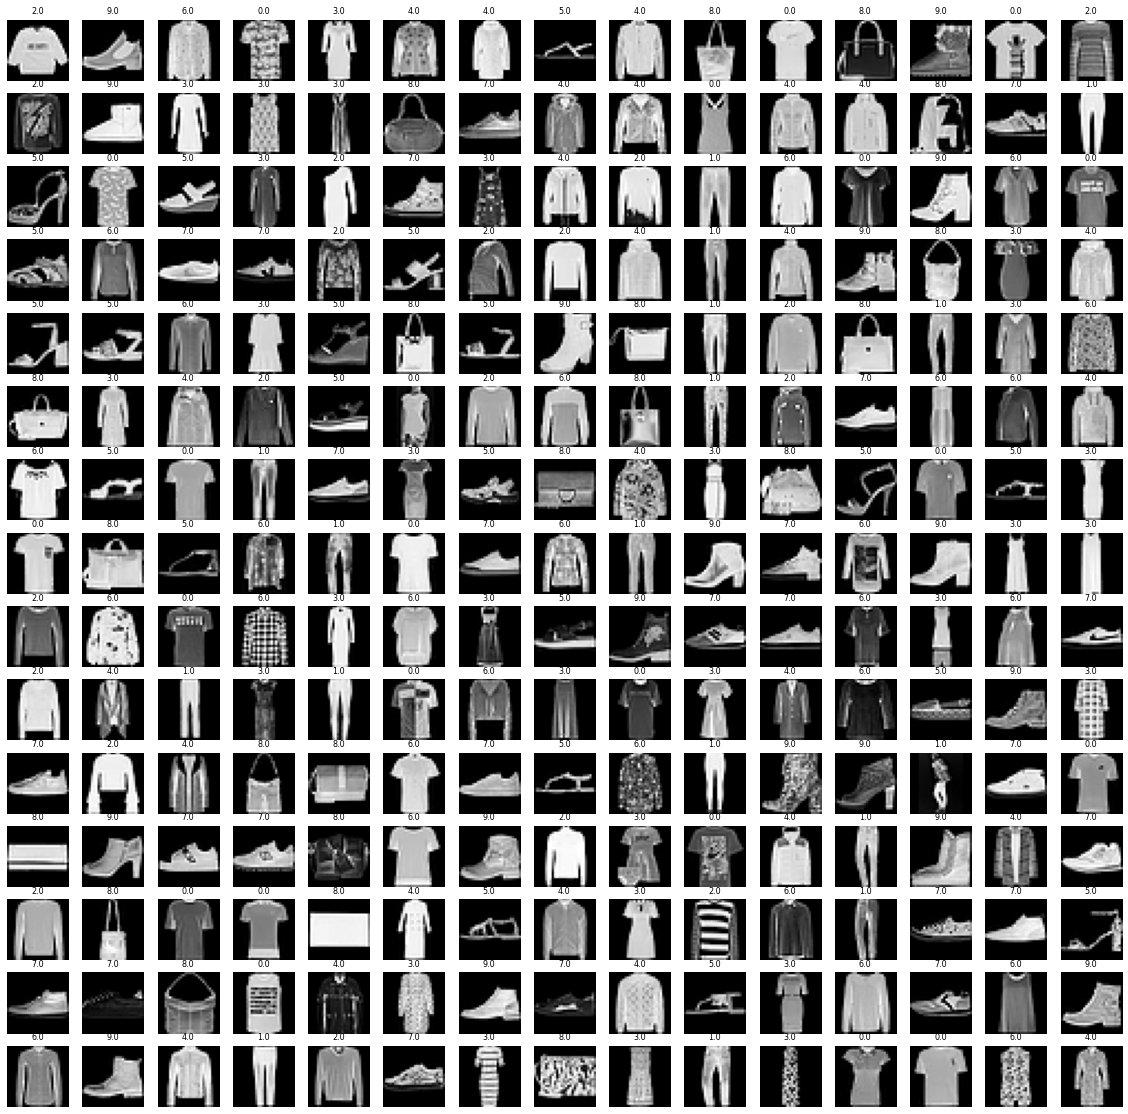

In [18]:
largura= 15
altura= 15

fig, img = plt.subplots(largura, altura, figsize=(20,20))
img = img.ravel()

num_treino = len(treino)

for i in np.arange(0, largura*altura):
  indice = np.random.randint(0, num_treino)
  img[i].imshow(treino[i,1:].reshape(28,28), cmap='gray')
  img[i].set_title(treino[i,0], fontsize=8)
  img[i].axis('off')


In [19]:
# as imagens estão da coluna 1 em diante
# estou dividindo por 255 para que cada valor esteja entre 0 e 1

X_treino = treino[:, 1:] / 255
y_treino = treino[:,0]

In [20]:
X_treino[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
y_treino[0]

2.0

In [22]:
X_teste = teste[:, 1:] / 255

In [23]:
X_teste[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03529412, 0.03137255, 0.        ,
       0.        , 0.13333334, 0.11372549, 0.02745098, 0.        ,
       0.04313726, 0.09411765, 0.        , 0.        , 0.01176471,
       0.01176471, 0.00392157, 0.        , 0.00392157, 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01568628, 0.        , 0.        , 0.00392157, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17254902,
       0.34509805, 0.3882353 , 0.47843137, 0.48235294, 0.3137255 ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.00392157, 0.00392157, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00392157, 0.00784314,
       0.        , 0.        , 0.        , 0.01176471, 0.18039216,
       0.68235296, 0.9764706 , 0.2627451 , 0.        , 0.36862746,
       0.8235294 , 0.23921569, 0.05490196, 0.83137256, 0.61568

In [24]:
y_teste = teste[:,0]

In [25]:
y_teste[0]

0.0

In [26]:
y_treino

array([2., 9., 6., ..., 8., 8., 7.], dtype=float32)

In [27]:
X_teste.shape

(10000, 784)

In [28]:
X_treino.shape

(60000, 784)

In [29]:
X_treino.shape[0]

60000

In [30]:
X_treino.shape

(60000, 784)

In [31]:
X_treino[0].shape

(784,)

In [32]:
X_treino_reshape = X_treino.reshape(60000, *(28,28,1) ) # 28x28 e 1 canal de escala de cinza

#Pode ser também no formato abaixo
# A função do asterisco é desconstruir objetos como listas e tuplas na chamada de funções e métodos, 
# onde cada elemento será passado como argumento.
#X_treino_reshape1 = X_treino.reshape(60000,  28, 28, 1)


In [33]:
# formato tem que ser linhaxcoluna e cores (se 1 for eh pq eu treino com tons de cinza, 
# se 3 sera pq vc treinou a cnn com imagens coloridas) 
X_treino_reshape.shape

(60000, 28, 28, 1)

In [34]:
X_teste.shape[0]

10000

In [35]:
X_teste_reshape = X_teste.reshape(X_teste.shape[0], *(28,28,1) ) # 28x28 e 1 canal de escala de cinza

In [36]:
X_teste_reshape.shape

(10000, 28, 28, 1)

In [37]:
# Enfim posso construir o modelo da rede neural convolucional
from tensorflow.keras import layers, models

modelo_predicao_roupa = models.Sequential()

# input_shape continua a mesma idéia do que aprendemos antes, 
# input_shape=(28,28,1)

# Etapa1 - camada de convolução
# filters=32, kernel_size=(3,3) posso informar o que eu desejar
modelo_predicao_roupa.add(  layers.Conv2D( filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1) ) )

# Etapa2 - camada Pooling
modelo_predicao_roupa.add ( layers.MaxPooling2D(2,2)  )

# camada de convolução
modelo_predicao_roupa.add( layers.Conv2D( filters=64, kernel_size=(3,3), activation='relu'  ) )

# camada Pooling
modelo_predicao_roupa.add ( layers.MaxPooling2D(2,2)  )

# Comentário apenas para teste e informando e pode ajudar a evitar sobreajustamento
#modelo_predicao_roupa.add(tf.keras.layers.Dropout(0.2))

# camada de convolução
modelo_predicao_roupa.add( layers.Conv2D( filters=64, kernel_size=(3,3), activation='relu'  ) )

# Etapa 3 - Flattening
modelo_predicao_roupa.add( layers.Flatten()  )




# Etapa 4 - Rede neural densa
# units=64 é da camada oculta
modelo_predicao_roupa.add(  layers.Dense( units=64, activation='relu' )  )

# A última camada será a saída
modelo_predicao_roupa.add(  layers.Dense(units=10, activation='softmax')  )



In [38]:
modelo_predicao_roupa.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [39]:
# One Hot Encoder 0 a 9
# Quando não usar o formato acima pode usar sparse_categorical_crossentropy
modelo_predicao_roupa.compile(optimizer='Adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [40]:
X_treino_reshape.shape

(60000, 28, 28, 1)

In [41]:
y_treino[0]

2.0

In [42]:
epocas = 3

historico_epocas = modelo_predicao_roupa.fit(X_treino_reshape, y_treino, batch_size=512, epochs=epocas)

Epoch 1/3
118/118 [==============================] - 12s 102ms/step - loss: 0.9000 - accuracy: 0.6783
Epoch 2/3
118/118 [==============================] - 12s 102ms/step - loss: 0.5084 - accuracy: 0.8115
Epoch 3/3
118/118 [==============================] - 12s 102ms/step - loss: 0.4264 - accuracy: 0.8472


In [43]:
avaliacao = modelo_predicao_roupa.evaluate(X_teste_reshape, y_teste)

# loss: 0.4034 - accuracy: 0.8534

313/313 [==============================] - 1s 3ms/step - loss: 0.4275 - accuracy: 0.8468


In [44]:
y_teste

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

In [45]:
avaliacao

[0.42753955721855164, 0.8468000292778015]

In [64]:
predicao_classes = modelo_predicao_roupa.predict(X_teste_reshape)
# pode ser feito também com predicao_classes = modelo_predicao_roupa.predict_classes(X_teste_reshape)

In [65]:
predicao_classes

array([[9.7222418e-01, 2.6763101e-07, 2.5402635e-04, ..., 3.4156418e-08,
        5.0174789e-05, 1.4193016e-08],
       [1.0558878e-05, 9.9974185e-01, 5.0813792e-08, ..., 3.2437690e-06,
        2.4929528e-07, 3.5511789e-08],
       [7.8032695e-02, 2.2551270e-05, 5.2136302e-01, ..., 3.7438225e-05,
        3.8715542e-04, 1.0548326e-04],
       ...,
       [1.1742849e-05, 2.7899952e-10, 2.3039232e-05, ..., 2.1152364e-04,
        9.9886215e-01, 4.2476722e-06],
       [6.3940108e-02, 4.0993287e-05, 1.2664117e-01, ..., 5.8570509e-05,
        5.8435720e-01, 1.5317701e-04],
       [3.3502743e-02, 2.6241343e-03, 7.6985997e-01, ..., 3.3353583e-05,
        1.9885304e-03, 6.1492712e-05]], dtype=float32)

In [77]:
#int(np.max(predicao_classes[0]))

i = 1
#print(predicao_classes[i], y_teste[i])
print(float(np.where(predicao_classes[i] == np.max(predicao_classes[i]))[0][0]) , y_teste[i])

print((np.argmax(predicao_classes[i])).astype(float) , y_teste[i])

1.0 1.0
1.0 1.0


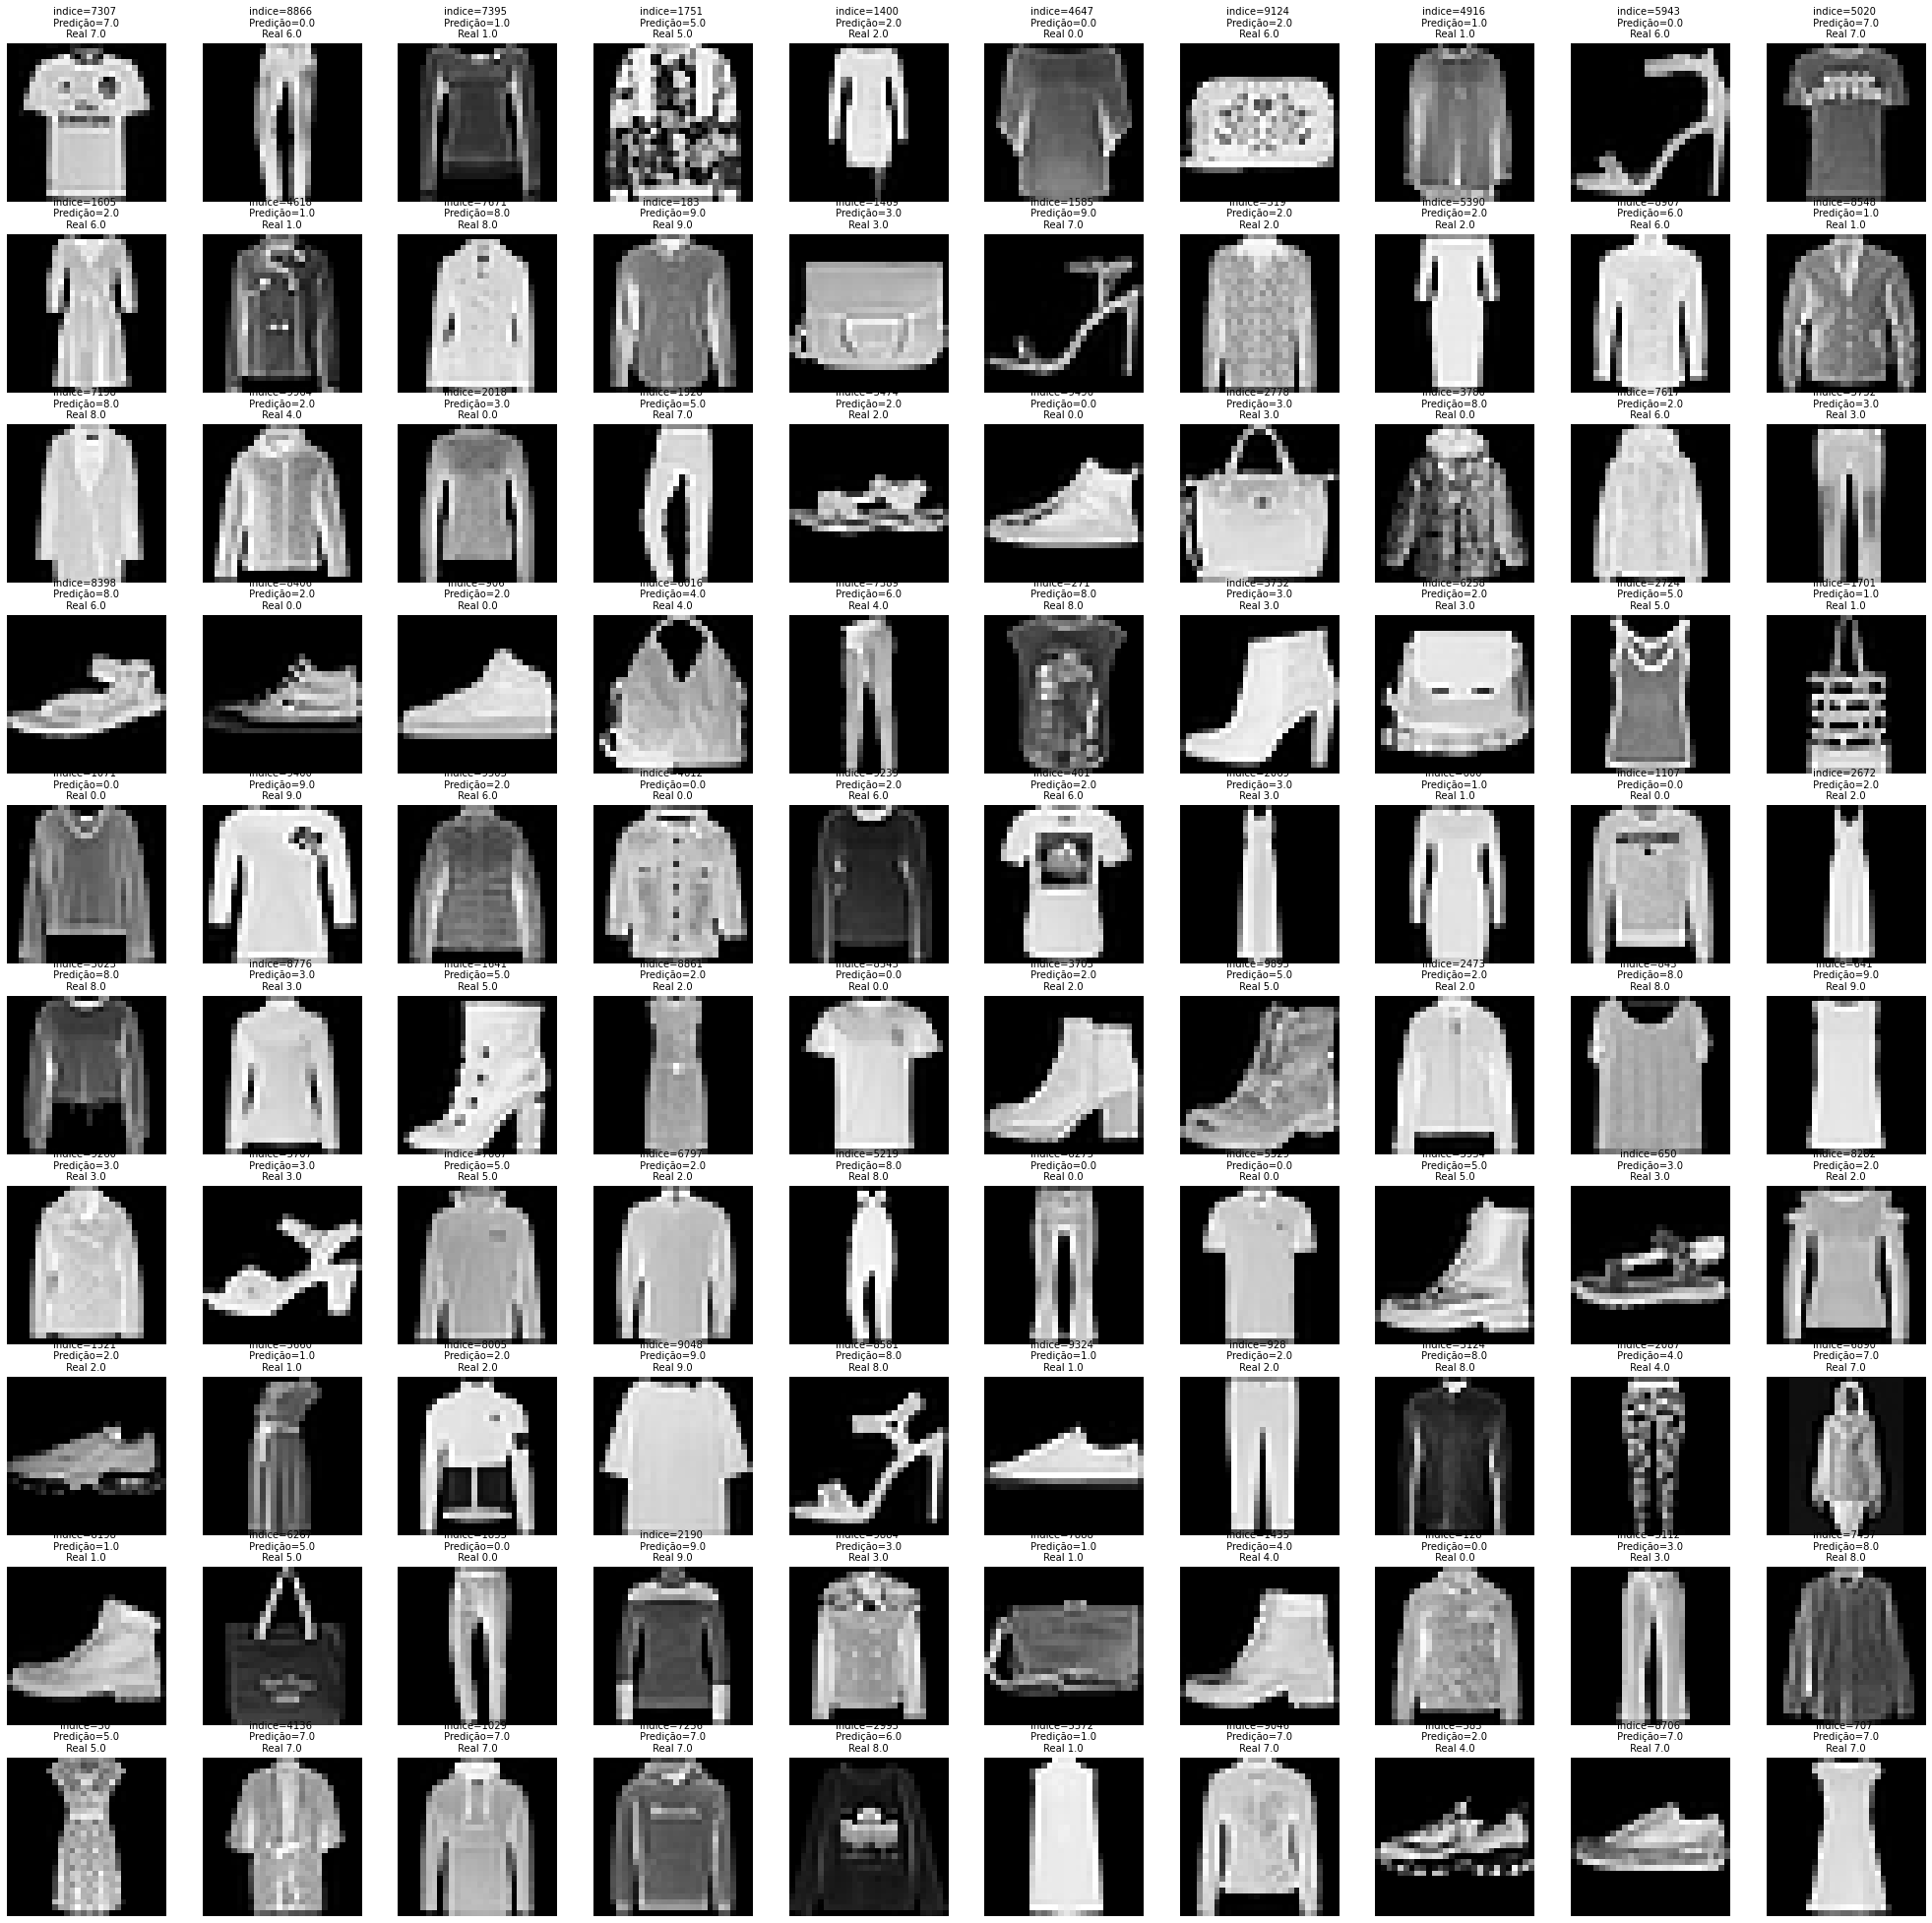

In [49]:
def indice_pred(pred, i):
    res = np.where(pred[i] == np.max(pred[i]))
    return res

largura= 10
altura= 10

fig, img = plt.subplots(largura, altura, figsize=(35,35))
img = img.ravel()

num_teste = len(teste)

for i in np.arange(0, largura*altura):
    indice = np.random.randint(0, num_teste)
    img[i].imshow(teste[i,1:].reshape(28,28), cmap='gray')
    classe_pred=indice_pred(predicao_classes, indice)
    img[i].set_title("indice={} \n Predição={:0.1f} \n Real {:0.1f} ".format(indice, classe_pred[0][0], y_teste[indice]), fontsize=10)
    img[i].axis('off')

In [50]:
temp = []

for i in range(len(predicao_classes)):
    temp = np.append(temp, float(np.where(predicao_classes[i] == np.max(predicao_classes[i]))[0][0]))

In [51]:
from sklearn.metrics import classification_report

print(classification_report(temp, y_teste))

              precision    recall  f1-score   support

         0.0       0.87      0.71      0.78      1217
         1.0       0.95      0.99      0.97       959
         2.0       0.88      0.67      0.76      1304
         3.0       0.93      0.79      0.86      1172
         4.0       0.71      0.83      0.77       855
         5.0       0.96      0.92      0.94      1043
         6.0       0.38      0.77      0.51       491
         7.0       0.90      0.93      0.91       968
         8.0       0.94      0.96      0.95       973
         9.0       0.95      0.93      0.94      1018

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.88      0.85      0.85     10000



In [52]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(temp, y_teste))

[[867   1  21  30   7   0 286   0   5   0]
 [  1 953   0   3   0   0   2   0   0   0]
 [ 25   3 879  16 166   0 190   0  25   0]
 [ 67  36  15 931  66   0  55   0   2   0]
 [  1   1  51   7 713   0  78   0   4   0]
 [  5   2   1   1   0 962   0  44  15  13]
 [ 20   4  28  12  46   0 377   0   4   0]
 [  0   0   0   0   0  29   0 898   5  36]
 [ 14   0   5   0   2   1  12   0 938   1]
 [  0   0   0   0   0   8   0  58   2 950]]


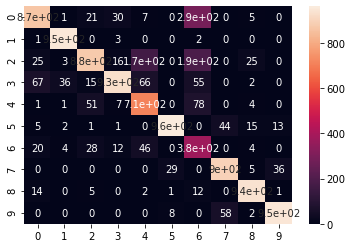

In [53]:
sns.heatmap(confusion_matrix(temp, y_teste), annot=True)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1217
           1       0.95      0.99      0.97       959
           2       0.88      0.67      0.76      1304
           3       0.93      0.79      0.86      1172
           4       0.71      0.83      0.77       855
           5       0.96      0.92      0.94      1043
           6       0.38      0.77      0.51       491
           7       0.90      0.93      0.91       968
           8       0.94      0.96      0.95       973
           9       0.95      0.93      0.94      1018

    accuracy                           0.85     10000
   macro avg    

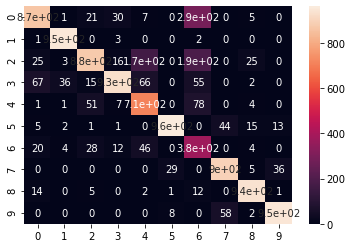

In [54]:
# predict_classes já faz a previsão das classes 
predicao_classes = modelo_predicao_roupa.predict_classes(X_teste_reshape)

print(classification_report(predicao_classes, y_teste))

sns.heatmap(confusion_matrix(predicao_classes, y_teste), annot=True)